### Step 1: Load Datasets

We begin by importing the two datasets:
- `freMTPL2freq.csv` for frequency modeling  
- `freMTPL2sev.csv` for severity modeling  

These datasets are the foundation of our auto insurance pricing model. We load them using pandas and inspect the first few rows to ensure everything is working correctly.

**Note:** We add the parent path to Python’s system path using sys.path.append(...). This allows us to import dataset paths (FREQ_FILE, SEV_FILE) defined in config.py.

In [43]:
import pandas as pd
import sys
import os

sys.path.append(os.path.abspath('..'))  # Parent directory to Python path

from config import FREQ_FILE, SEV_FILE

# Import datasets
df_freq = pd.read_csv(FREQ_FILE)
df_sev = pd.read_csv(SEV_FILE)

# Preview of both datasets
print('Frequency dataset:')
display(df_freq.head(1))

print('\nSeverity dataset:')
display(df_sev.head(1))

Frequency dataset:


,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0000,1,0.1000,D,5,0,55,50,B12,Regular,1217,R82



Severity dataset:


,IDpol,ClaimAmount
0,1552,995.2000


### Step 2: Initial Data Exploration

We check basic statistics, null values, and data types to understand the structure of, and potential quality issues with the datasets.

This step helps us to:
- verify expected data types and formats
- identify missing values or unusual entries
- detect early signs of outliers or inconsistencies

In [44]:
# General overview
print('*** Frequency Info ***')
df_freq.info()

print('\n*** Frequency Null Values ***')
print(df_freq.isnull().sum())

print('\n*** Frequency Description ***')
display(df_freq.describe())

print('\n*** Severity Info ***')
df_sev.info()

print('\n*** Severity Null Values ***')
print(df_sev.isnull().sum())

print('\n*** Severity Description ***')
display(df_sev.describe())

print('\n*** Frequency claim count equal to zero ***')
display((df_freq['ClaimNb'] == 0).sum())

*** Frequency Info ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       678013 non-null  float64
 1   ClaimNb     678013 non-null  int64  
 2   Exposure    678013 non-null  float64
 3   Area        678013 non-null  object 
 4   VehPower    678013 non-null  int64  
 5   VehAge      678013 non-null  int64  
 6   DrivAge     678013 non-null  int64  
 7   BonusMalus  678013 non-null  int64  
 8   VehBrand    678013 non-null  object 
 9   VehGas      678013 non-null  object 
 10  Density     678013 non-null  int64  
 11  Region      678013 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 62.1+ MB

*** Frequency Null Values ***
IDpol         0
ClaimNb       0
Exposure      0
Area          0
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
VehBrand      0
VehGas        0
Density       0
Region  

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
count,"678,013.0000","678,013.0000","678,013.0000","678,013.0000","678,013.0000","678,013.0000","678,013.0000","678,013.0000"
mean,"2,621,856.9211",0.0532,0.5288,6.4546,7.0443,45.4991,59.7615,"1,792.4224"
std,"1,641,782.7527",0.2401,0.3644,2.0509,5.6662,14.1374,15.6367,"3,958.6466"
min,1.0000,0.0000,0.0027,4.0000,0.0000,18.0000,50.0000,1.0000
25%,"1,157,951.0000",0.0000,0.1800,5.0000,2.0000,34.0000,50.0000,92.0000
50%,"2,272,152.0000",0.0000,0.4900,6.0000,6.0000,44.0000,50.0000,393.0000
75%,"4,046,274.0000",0.0000,0.9900,7.0000,11.0000,55.0000,64.0000,"1,658.0000"
max,"6,114,330.0000",16.0000,2.0100,15.0000,100.0000,100.0000,230.0000,"27,000.0000"



*** Severity Info ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26639 entries, 0 to 26638
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IDpol        26639 non-null  int64  
 1   ClaimAmount  26639 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 416.4 KB

*** Severity Null Values ***
IDpol          0
ClaimAmount    0
dtype: int64

*** Severity Description ***


,IDpol,ClaimAmount
count,"26,639.0000","26,639.0000"
mean,"2,279,863.8311","2,278.5364"
std,"1,577,201.8069","29,297.4813"
min,139.0000,1.0000
25%,"1,087,642.5000",686.8100
50%,"2,137,413.0000","1,172.0000"
75%,"3,180,162.0000","1,228.0800"
max,"6,113,971.0000","4,075,400.5600"



*** Frequency claim count equal to zero ***


np.int64(643953)

In [45]:
# *** Frequency Dataset: Uniqueness Check ***
duplicated_ids_freq = df_freq['IDpol'].duplicated().sum()
unique_ids_freq = df_freq['IDpol'].nunique()
total_rows_freq = df_freq.shape[0]

print(f'Total rows in frequency dataset: {total_rows_freq}')
print(f'Unique IDpol values: {unique_ids_freq}')
print(f'Number of duplicated IDpol values: {duplicated_ids_freq}')

# *** Severity Dataset: Uniqueness & Claim Duplication Check ***
duplicated_ids_sev = df_sev['IDpol'].duplicated().sum()
unique_ids_sev = df_sev['IDpol'].nunique()
total_rows_sev = df_sev.shape[0]

print(f'\nTotal rows in severity dataset: {total_rows_sev}')
print(f'Unique IDpol values: {unique_ids_sev}')
print(f'Number of duplicated IDpol values: {duplicated_ids_sev}')

# IDs that appear more than once
multi_claims = df_sev['IDpol'].value_counts()
multi_claims = multi_claims[multi_claims > 1]

print(f'\nNumber of policies with multiple claim payments: {multi_claims.shape[0]}')
print('Top 5 policies with the most claim records:')
display(multi_claims.head())

# Example
example_id = multi_claims.index[0]
print(f'\nExample: Claim records for IDpol = {example_id}')
display(df_sev[df_sev['IDpol'] == example_id])

Total rows in frequency dataset: 678013
Unique IDpol values: 678013
Number of duplicated IDpol values: 0

Total rows in severity dataset: 26639
Unique IDpol values: 24950
Number of duplicated IDpol values: 1689

Number of policies with multiple claim payments: 1379
Top 5 policies with the most claim records:


IDpol
2262511    66
2282134    36
2227533    25
2220367    24
2277846    23
Name: count, dtype: int64


Example: Claim records for IDpol = 2262511


,IDpol,ClaimAmount
24857,2262511,"2,341.3700"
24858,2262511,"1,500.0000"
24863,2262511,135.9700
24864,2262511,"1,500.0000"
24865,2262511,"19,461.0000"
...,...,...
25492,2262511,"2,408.1800"
25506,2262511,124.6300
25508,2262511,"2,640.0000"
25526,2262511,382.7000


#### Step 2 Summary: Initial Observations

The most relevant findings of our data exploration are:

- No missing values in either dataset, which is excellent.
- Both datasets have the expected number of rows: 
  - `freMTPL2freq.csv`: 678,013 records (policy-level)
  - `freMTPL2sev.csv`: 26,639 records (claim-level)

--

##### Frequency Dataset: Data Type Considerations
- Several features are of type **object** (*Area*, *VehBrand*, *VehGas*, *Region*). These may need to be explicitly cast to **category** or encoded later.
- IDpol is a **float64** in the frequency dataset but an **int64** in the severity dataset. We may want to standardize this type before merging or joining.

##### Frequency Dataset: Potential Data Quality Issues
- ClaimNb is highly skewed: the *mean is 0.05*, but the *max is 16*. This indicates **zero-inflation** and, possibly, **extreme values or errors**.
- Exposure ranges up to *2.01*, which is unexpected since exposure typically represents a fraction of the year (i.e., 0 < exposure ≤ 1).
- VehAge and DrivAge both reach *100 years*. These are likely **outliers** or **entry errors**.
- BonusMalus goes up to *230*, significantly beyond typical bounds (e.g., 50–150); we will validate this during cleaning.
- Density has a very wide range (up to *27,000*), which could be valid if it represents population density in highly urbanized areas like Paris. We will keep it and monitor its influence.

--

##### Severity Dataset: ClaimAmount Check
- The maximum ClaimAmount is over *4,000,000*, while the median is around 1,170. This confirms that we are indeed dealing with **Euro amounts**, and the values are **realistically scaled**. No conversion is needed here. Nonetheless, further investigation of amounts will be carried out.

##### Severity Dataset: Structure

- The dataset contains 26,639 rows and 24,950 **unique IDpol** values, indicating that some policies have multiple claim occurrences.
- Each row represents a distinct claim associated with a policy.
- To prepare for the merging with the frequency dataset, we will aggregate the severity data by **IDpol** to compute:
  - The total number of claims (ClaimNb)
  - The total claim amount (ClaimAmount)

### Step 2: Implementation of Initial Observations

In [46]:
# Frequency dataset treatment
# Convert object types to category
for col in df_freq.select_dtypes(include='object').columns:
    df_freq[col] = df_freq[col].astype('category')

# Standardize IDpol as int in both datasets
df_freq['IDpol'] = df_freq['IDpol'].astype('int64')
df_sev['IDpol'] = df_sev['IDpol'].astype('int64')

# Verify changes
print(df_freq.dtypes)
print('\nIDpol dtype in df_freq:', df_freq['IDpol'].dtype)
print('IDpol dtype in df_sev:', df_sev['IDpol'].dtype)

IDpol            int64
ClaimNb          int64
Exposure       float64
Area          category
VehPower         int64
VehAge           int64
DrivAge          int64
BonusMalus       int64
VehBrand      category
VehGas        category
Density          int64
Region        category
dtype: object

IDpol dtype in df_freq: int64
IDpol dtype in df_sev: int64


In [47]:
# Severity dataset treatment
# Aggreate by IDpol
df_sev['ClaimNb'] = 1
df_sev_agg = df_sev.groupby('IDpol').agg({
    'ClaimNb': 'sum',
    'ClaimAmount': 'sum'
}).reset_index()

### Step 3: Further Exploration

With the basic structure validated, we now deepen our understanding of each variable and its modeling potential. This step includes:

- Clear classification of each variable as continuous, ordinal or nominal categorical
- Outlier detection in continuous variables using both visual (boxplots) and statistical (IQR) methods
- Examination of ordinal categorical variables to decide on binning or transformation
- Confirmation of consistent and appropriate data types across the datasets

#### Step 3.A: Outlier Detection – Continuous Variables

In this section, we inspect continuous variables for outliers using:

- **Boxplots** to visualize extreme values
- **IQR-based statistical method** to flag values that lie outside the 1.5×IQR range

Variables analyzed:
- From frequency dataset: Exposure, VehAge, DrivAge, Density
- From severity dataset: ClaimAmount

!Note: We apply log-scaling to *ClaimAmount* for a clearer boxplot visualization due to the extreme right-skew.

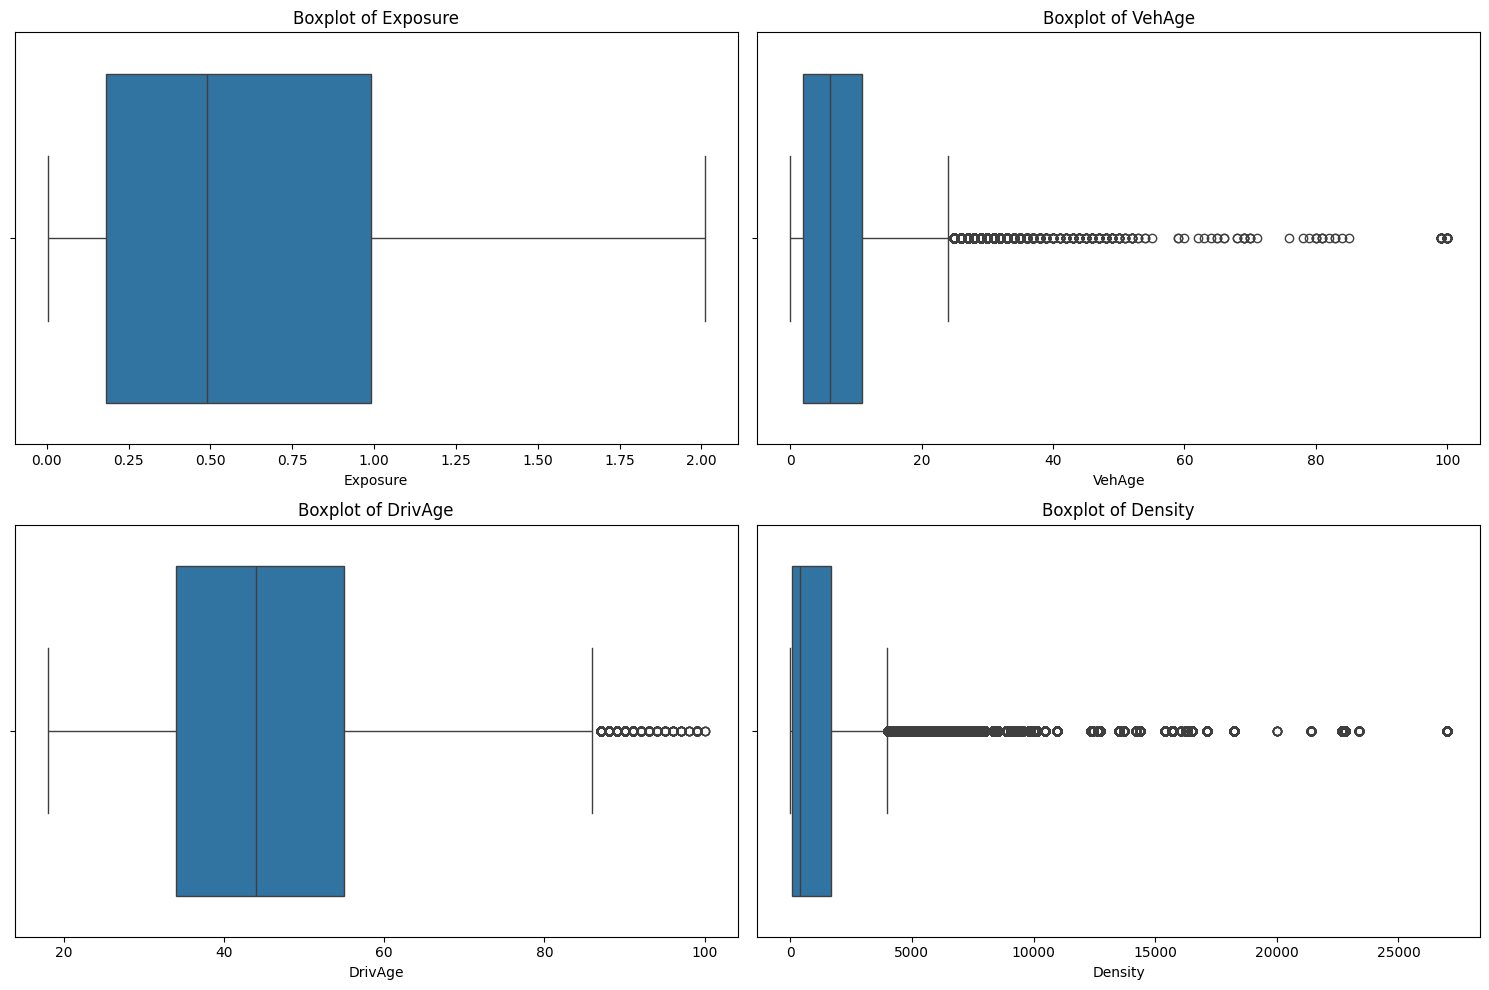

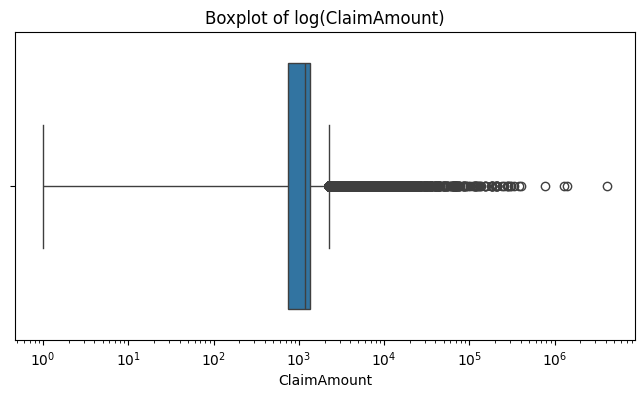

,Variable,Q1,Q3,IQR,Lower Bound,Upper Bound,Outlier Count,Outlier %
0,Exposure,0.1800,0.9900,0.8100,-1.0350,2.2050,0,0.0000
1,VehAge,2.0000,11.0000,9.0000,-11.5000,24.5000,3114,0.4593
2,DrivAge,34.0000,55.0000,21.0000,2.5000,86.5000,1275,0.1880
3,Density,92.0000,"1,658.0000","1,566.0000","-2,257.0000","4,007.0000",77566,11.4402
4,ClaimAmount,749.8400,"1,346.4000",596.5600,-145.0000,"2,241.2400",3767,15.0982


83.0
24.0


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the variables
freq_cont_vars = ['Exposure', 'VehAge', 'DrivAge', 'Density']
sev_cont_vars = ['ClaimAmount']

# Plot the frequency variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(freq_cont_vars):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df_freq[var], orient='h')
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()

# Plot the severity variable ClaimAmount (log scaled)
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_sev_agg['ClaimAmount'])
plt.title('Boxplot of log(ClaimAmount)')
plt.xscale('log')  # for extreme range
plt.show()

# IQR-based outlier detection function
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    return {
        'Variable': series.name,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower,
        'Upper Bound': upper,
        'Outlier Count': outliers.count(),
        'Outlier %': 100 * outliers.count() / len(series)
    }

# Apply IQR analysis
outlier_summary = []
for var in freq_cont_vars:
    outlier_summary.append(detect_outliers_iqr(df_freq[var]))
outlier_summary.append(detect_outliers_iqr(df_sev_agg['ClaimAmount']))

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)

# 99.5 quantile analysis
print(df_freq['DrivAge'].quantile(0.995))
print(df_freq['VehAge'].quantile(0.995))

#### Step 3.A: Outlier detection implementations

In [49]:
# Cap
df_freq['Exposure_cap'] = df_freq['Exposure'].clip(upper=1.0)
df_freq['VehAge_cap'] = df_freq['VehAge'].clip(upper=40)
df_freq['DrivAge_cap'] = df_freq['DrivAge'].clip(upper=90)

# Effects of capping
for col in ['Exposure', 'VehAge', 'DrivAge']:
    print(f'*** {col} (original) vs {col}_cap ***')
    display(
        pd.DataFrame({
            'Original': df_freq[col].describe(),
            'Capped': df_freq[f'{col}_cap'].describe()
        })
    )

*** Exposure (original) vs Exposure_cap ***


,Original,Capped
count,"678,013.0000","678,013.0000"
mean,0.5288,0.5285
std,0.3644,0.3641
min,0.0027,0.0027
25%,0.1800,0.1800
50%,0.4900,0.4900
75%,0.9900,0.9900
max,2.0100,1.0000


*** VehAge (original) vs VehAge_cap ***


,Original,Capped
count,"678,013.0000","678,013.0000"
mean,7.0443,7.0371
std,5.6662,5.5960
min,0.0000,0.0000
25%,2.0000,2.0000
50%,6.0000,6.0000
75%,11.0000,11.0000
max,100.0000,40.0000


*** DrivAge (original) vs DrivAge_cap ***


,Original,Capped
count,"678,013.0000","678,013.0000"
mean,45.4991,45.4969
std,14.1374,14.1299
min,18.0000,18.0000
25%,34.0000,34.0000
50%,44.0000,44.0000
75%,55.0000,55.0000
max,100.0000,90.0000


##### Step 3.A Summary: Outlier Detection in Continuous Variables

We analyzed continuous variables using boxplots and IQR thresholds. The following actions were taken:

- **Exposure**: Capped at 1.0, as it represents the fraction of a year during which a policy is active.
- **VehAge**: Capped at 40 to reduce the impact of rare, very old vehicles.
- **DrivAge**: Capped at 90 to limit the influence of rare but valid elderly drivers.
- **Density**: Right-skewed due to a few high-density areas; no capping applied; a log transformation may be considered during modeling.
- **ClaimAmount**: Highly right-skewed with extreme values. No capping applied; possible log transformation in future severity modeling.

All capping decisions were based on domain logic and practical modeling needs, not purely on statistical thresholds.

---

#### Step 3.B: Ordinal Variable Exploration

In this section, we analyze ordinal variables whose values represent ordered but discrete levels, using:

- **Count plots** to visualize frequency per category
- **Value counts and percentages** for exact numbers

Variables analyzed:
- VehPower: Engine power groupings
- ClaimNb: Number of claims reported per policy
- BonusMalus: Policyholder risk score based on claim history

We will inspect their distributions and detect unusual or infrequent levels to further binning them or transforming them.

*** VehPower - Count and Percentage ***


,Count,Percent
VehPower,,
4,115349,17.0100
5,124821,18.4100
6,148976,21.9700
7,145401,21.4500
8,46956,6.9300
9,30085,4.4400
10,31354,4.6200
11,18352,2.7100
12,8214,1.2100


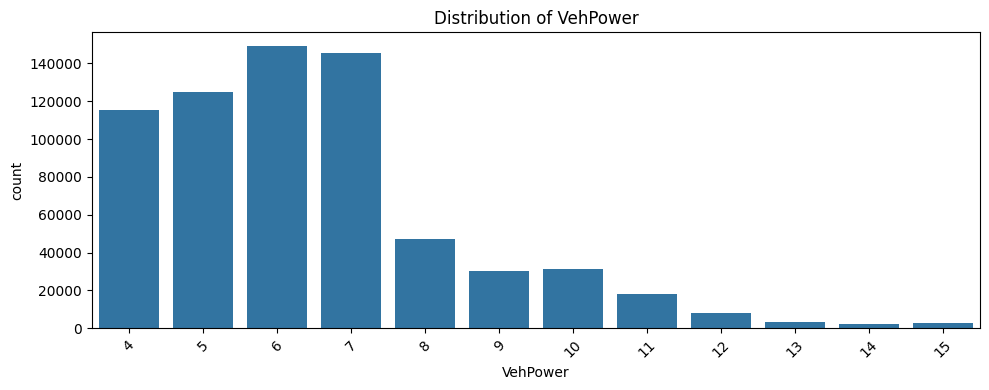

*** ClaimNb - Count and Percentage ***


,Count,Percent
ClaimNb,,
0,643953,94.9800
1,32178,4.7500
2,1784,0.2600
3,82,0.0100
4,7,0.0000
5,2,0.0000
6,1,0.0000
8,1,0.0000
9,1,0.0000


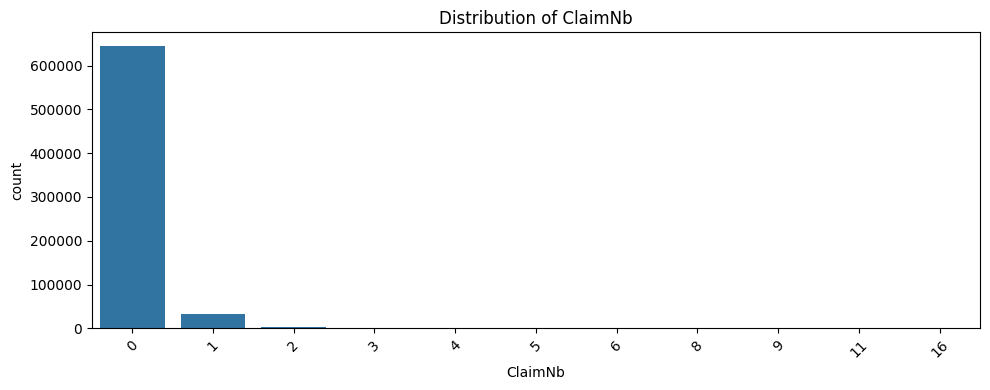

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Inspect VehPower 
vehpower_counts = df_freq['VehPower'].value_counts().sort_index()
vehpower_percents = df_freq['VehPower'].value_counts(normalize=True).sort_index() * 100

vehpower_summary = pd.DataFrame({
    'Count': vehpower_counts,
    'Percent': vehpower_percents.round(2)
})

print('*** VehPower - Count and Percentage ***')
display(vehpower_summary)

plt.figure(figsize=(10, 4))
sns.countplot(data=df_freq, x='VehPower', order=sorted(df_freq['VehPower'].unique()))
plt.title('Distribution of VehPower')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Inspect ClaimNb
claimnb_counts = df_freq['ClaimNb'].value_counts().sort_index()
claimnb_percents = df_freq['ClaimNb'].value_counts(normalize=True).sort_index() * 100

claimnb_summary = pd.DataFrame({
    'Count': claimnb_counts,
    'Percent': claimnb_percents.round(2)
})

print('*** ClaimNb - Count and Percentage ***')
display(claimnb_summary)

plt.figure(figsize=(10, 4))
sns.countplot(data=df_freq, x='ClaimNb', order=sorted(df_freq['ClaimNb'].unique()))
plt.title('Distribution of ClaimNb')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

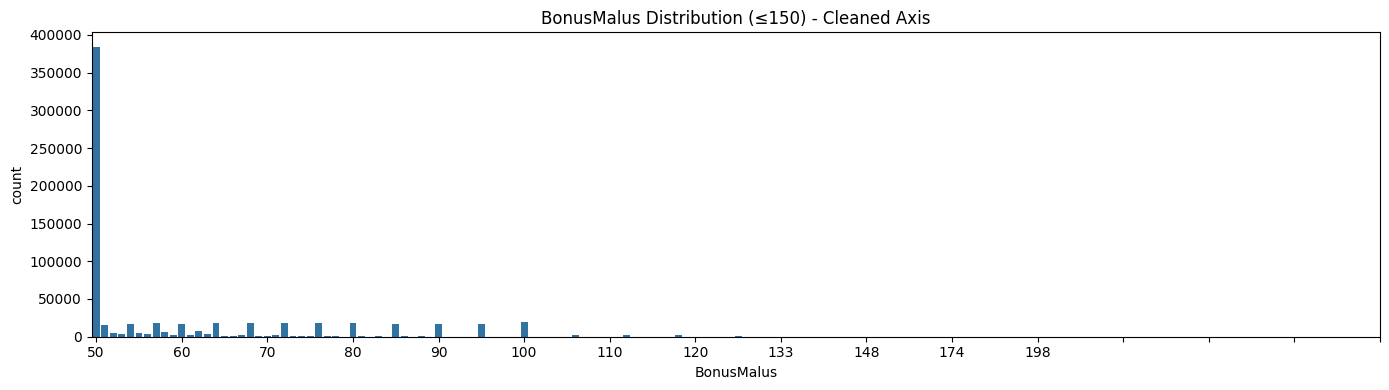

In [51]:
# Inspect BonusMalus

plt.figure(figsize=(14, 4))
sns.countplot(data=df_freq[df_freq['BonusMalus'] <= 150], x='BonusMalus', order=sorted(df_freq['BonusMalus'].unique()))
plt.title('BonusMalus Distribution (≤150) - Cleaned Axis')
plt.xticks(ticks=range(0, 151, 10))  # show every 10th tick
plt.tight_layout()
plt.show()

#### Step 3.B: Ordinal variable exploration implementations

In [52]:
# Implementation for ClaimNb: Cap
df_freq['ClaimNb_cap'] = df_freq['ClaimNb'].clip(upper=4)

##### Step 3.B Summary: Ordinal Variable Exploration

We explored three ordinal variables:

- **VehPower**: Values range from 4 to 15 and show a right-skewed distribution, with most vehicles concentrated between 4 and 7. No transformation was applied at this stage, though values above 10 may be grouped later if needed, for model simplicity.

- **ClaimNb**: Values above 4 were capped due to extreme rarity (<0.01% of records), to prevent undue influence on modeling.

- **BonusMalus**: The variable contains 115 unique levels with extreme imbalance. 63% of records fall at level 50, and many levels occur rarely. Groupings were not carried out at this stage; a bivariate analysis with the target variables will provide accurate insights for grouping.

---

### Step 4: Univariate Analysis

In this step, we examine the distribution of each variable individually to:

- Understand their central tendency, spread, and shape
- Identify skewness, multimodality, or unusual patterns
- Decide whether transformations (e.g., log, binning) might be appropriate
- Highlight dominant categories or class imbalance (for categorical variables)

We will separate continuous, ordinal, and categorical variables and analyze each group with appropriate plots and summaries.

#### Step 4.A: Continuos variables

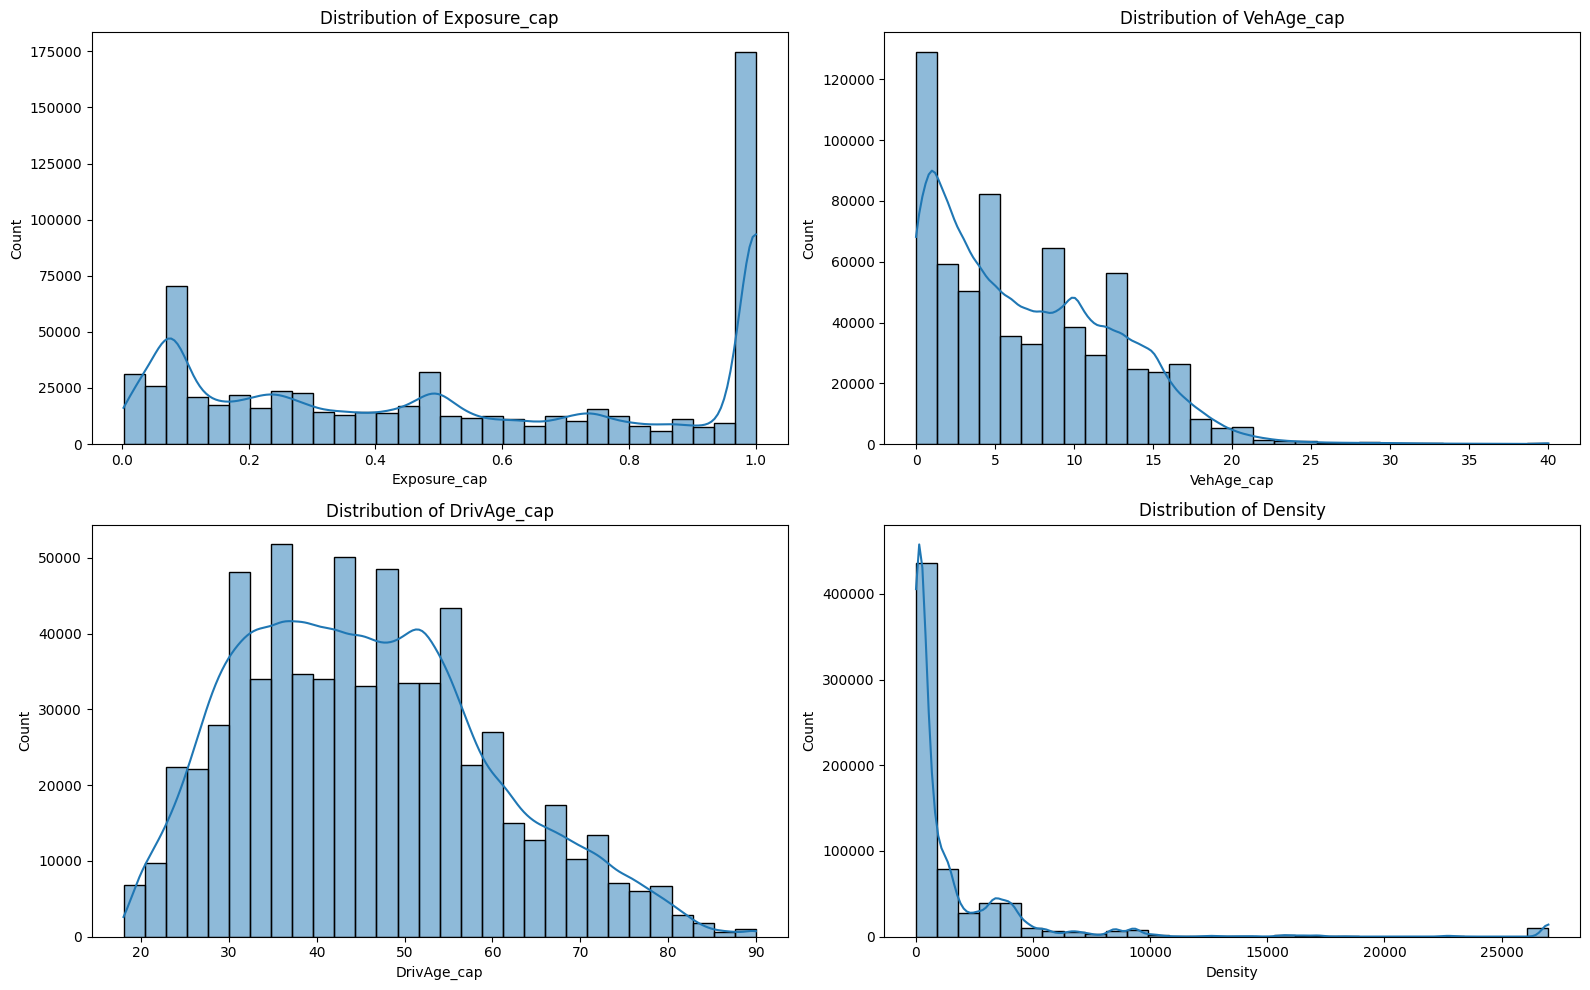

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Continuous variables
cont_vars = ['Exposure_cap', 'VehAge_cap', 'DrivAge_cap', 'Density']

# Histograms
plt.figure(figsize=(16, 10))
for i, var in enumerate(cont_vars):
    plt.subplot(2, 2, i + 1)
    
    if var == 'VehAge_cap':
        sns.histplot(df_freq[var], kde=True, bins=30, kde_kws={'bw_adjust': 1.5})
    else:
        sns.histplot(df_freq[var], kde=True, bins=30)
    
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

##### Step 4.A Summary: Continuous Variable Distributions

We analyzed the distribution of continuous variables using histograms and KDE plots. Below are the key insights and planned actions:

- **Exposure_cap**: Most policies have full-year coverage (Exposure = 1), creating a strong right skew. Since exposure is used as a time-based denominator, we will apply a log transformation during modeling and treat it as an **offset** in the GLM framework.

- **VehAge_cap**: The distribution is strongly right-skewed, with the majority of vehicles being relatively new (under 10 years). No transformation is needed for now, but its non-normal shape may affect linear models.

- **DrivAge_cap**: Shows a semi-normal distribution, peaking between 35 and 55. While it is not symmetric, it does not require transformation. This shape is expected based on driving-age populations.

- **Density**: Extremely right-skewed, likely reflecting population density variations across regions. A **log transformation** will be applied in Step 6 to reduce skew and stabilize variance.

In general, log transformation will be considered for variables with heavy right-skewed distributions to improve model performance and interpretability.

---

#### Step 4.B: Categorical variables

In [54]:
import pandas as pd

# Categorical variables
cat_vars = ['Area', 'VehBrand', 'VehGas', 'Region']

# Count/percentage tables
for var in cat_vars:
    print(f'\n*** {var} - Value Counts and Percentages ***')
    
    counts = df_freq[var].value_counts().sort_index()
    percents = df_freq[var].value_counts(normalize=True).sort_index() * 100
    
    summary = pd.DataFrame({
        'Count': counts,
        'Percent': percents.round(2)
    }).sort_values(by='Count', ascending=False)
    
    display(summary)


*** Area - Value Counts and Percentages ***


,Count,Percent
Area,,
C,191880,28.3000
D,151596,22.3600
E,137167,20.2300
A,103957,15.3300
B,75459,11.1300
F,17954,2.6500



*** VehBrand - Value Counts and Percentages ***


,Count,Percent
VehBrand,,
B12,166024,24.4900
B1,162736,24.0000
B2,159861,23.5800
B3,53395,7.8800
B5,34753,5.1300
B6,28548,4.2100
B4,25179,3.7100
B10,17707,2.6100
B11,13585,2.0000



*** VehGas - Value Counts and Percentages ***


,Count,Percent
VehGas,,
Regular,345877,51.0100
Diesel,332136,48.9900



*** Region - Value Counts and Percentages ***


,Count,Percent
Region,,
R24,160601,23.6900
R82,84752,12.5000
R93,79315,11.7000
R11,69791,10.2900
R53,42122,6.2100
R52,38751,5.7200
R91,35805,5.2800
R72,31329,4.6200
R31,27285,4.0200


##### Step 4.B Summary: Categorical Variable Distributions

We explored the distribution of four categorical variables:

- **Area**: Six categories with a fairly balanced spread. No transformation needed.
- **VehBrand**: Dominated by B1, B2, and B12 (70%+ combined). Rare levels (e.g., B14) flagged for potential grouping later.
- **VehGas**: Perfectly balanced between Diesel and Regular. Ready for binary encoding if needed.
- **Region**: 22 regions with high imbalance. Multiple categories below 1% flagged for review during modeling.

At this stage, all variables are retained as-is. Visualizations were omitted to reduce clutter and focus on relationships in later stages such as Bivariate Analysis and Feature Engineering.

---

In [55]:
# Merge frequency and severity datasets
df_freq_sev = df_freq.merge(df_sev_agg.rename(columns={'ClaimNb': 'ClaimNb_sev'}), on='IDpol', how='left')
df_freq_sev[['ClaimNb_sev', 'ClaimAmount']] = df_freq_sev[['ClaimNb_sev', 'ClaimAmount']].fillna(0)

# Validity checks
n_zero_amt = (df_freq_sev['ClaimAmount'] == 0).sum()
n_zero_clm = (df_freq_sev['ClaimNb_cap'] == 0).sum()
n_amt_no_clm = df_freq_sev.query('ClaimNb_cap == 0 and ClaimAmount > 0').shape[0]
n_clm_no_amt = df_freq_sev.query('ClaimNb_cap > 0 and ClaimAmount == 0').shape[0]
xxxx = df_freq_sev.query('ClaimNb_cap == 0 and ClaimAmount == 0').shape[0]

print(f'ClaimAmount == 0: {n_zero_amt:,}')
print(f'ClaimNb_cap == 0: {n_zero_clm:,}')
print(f'ClaimAmount > 0 with ClaimNb_cap == 0: {n_amt_no_clm:,}')
print(f'ClaimNb_cap > 0 with ClaimAmount == 0: {n_clm_no_amt:,}')
print(f'ClaimNb_cap == 0 with ClaimAmount == 0: {xxxx:,}')

# Mismatch check between ClaimNb (from freq) and ClaimNb_sev (from sev)
df_freq_sev['ClaimNb_diff'] = df_freq_sev['ClaimNb'] - df_freq_sev['ClaimNb_sev']
n_match = (df_freq_sev['ClaimNb_diff'] == 0).sum()
n_mismatch = (df_freq_sev['ClaimNb_diff'] != 0).sum()

print(f'Matching ClaimNb: {n_match:,}')
print(f'Mismatched ClaimNb: {n_mismatch:,}')
print('\nTop mismatch differences:')
print(df_freq_sev['ClaimNb_diff'].value_counts().head())

ClaimAmount == 0: 653,069
ClaimNb_cap == 0: 643,953
ClaimAmount > 0 with ClaimNb_cap == 0: 0
ClaimNb_cap > 0 with ClaimAmount == 0: 9,116
ClaimNb_cap == 0 with ClaimAmount == 0: 643,953
Matching ClaimNb: 668,896
Mismatched ClaimNb: 9,117

Top mismatch differences:
ClaimNb_diff
0.0000    668896
1.0000      8609
2.0000       485
3.0000        20
4.0000         2
Name: count, dtype: int64


##### Merging Summary: Frequency × Severity

We merged the policy-level frequency dataset with the aggregated severity dataset using *IDpol* as the unique key.

After merging:

- **ClaimNb_cap** from the frequency dataset and **ClaimNb_sev** from the severity dataset displayed a mismatch in **9,116 policies** (approx. 1.34% of all records).
- In these mismatches, **ClaimNb_cap > 0** but **ClaimAmount = 0**, meaning a claim was declared but no payment was made.
- No cases were found where **ClaimNb_cap == 0** and **ClaimAmount > 0**, confirming consistency and integrity of claims reporting.

These mismatches are retained for modeling and reflect real-world insurance operations. Business-driven explanations include:

- **Claims below deductible**: registered by the policyholder but not paid.
- **Withdrawn or rejected claims**: counted as a claim but not resulting in payment.
- **Timing mismatches**: claim declarations may appear in the frequency dataset before being settled in the severity database.
- **Rounding or data pipeline delays** in severity extracts.

For modeling consistency and accuracy:

- We use *ClaimNb_cap* from the **frequency dataset** as our single source of truth for the number of claims.
- *ClaimNb_sev* has been fully removed to avoid conflict.
- *AvgClaimAmount* will be calculated as *ClaimAmount / ClaimNb_cap* during severity modeling preparations, but only for records where *ClaimAmount > 0*.

This approach ensures alignment with business logic and modeling requirements.

---

### Step 5: Correlation and Multicollinearity Analysis

This step investigates two key aspects before modeling:

- **Linear correlation** between predictors and the target variables (**ClaimNb_cap** and **ClaimAmount**), to assess whether any features exhibit strong linear predictive signals.
- **Multicollinearity** among numeric and ordinal predictors using the Variance Inflation Factor (VIF), to ensure model interpretability and stability.

Both analyses support the choice of a sound modeling strategy and confirm that predictors are suitable for Generalized Linear Modeling (GLM) without requiring immediate dimensionality reduction or transformation.

In [56]:
# Linear correlation with target variables
features_to_check = ['Exposure_cap', 'VehAge_cap', 'DrivAge_cap', 'Density', 'VehPower', 'BonusMalus', 'ClaimNb_cap', 'ClaimAmount']
correlation_matrix = df_freq_sev[features_to_check].corr()

# Extract correlations
target_corr = correlation_matrix[['ClaimNb_cap', 'ClaimAmount']].drop(index=['ClaimNb_cap', 'ClaimAmount'])
target_corr = target_corr.round(2)
target_corr

,ClaimNb_cap,ClaimAmount
Exposure_cap,0.0700,0.0000
VehAge_cap,-0.0200,0.0000
DrivAge_cap,0.0100,-0.0000
Density,0.0100,-0.0000
VehPower,-0.0000,0.0000
BonusMalus,0.0500,0.0100


In [57]:
# Multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Numeric columns to test
numeric_cols = ['Exposure_cap', 'VehAge_cap', 'DrivAge_cap', 'Density', 'VehPower', 'BonusMalus']

# Standardize data
X = df_freq_sev[numeric_cols].dropna()  # Drop NA to avoid VIF errors
X_scaled = StandardScaler().fit_transform(X)

# Calculate VIF
vif_df = pd.DataFrame()
vif_df['Feature'] = numeric_cols
vif_df['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

display(vif_df)

,Feature,VIF
0,Exposure_cap,1.0836
1,VehAge_cap,1.0473
2,DrivAge_cap,1.3165
3,Density,1.0216
4,VehPower,1.0118
5,BonusMalus,1.3445


##### Step 5 Summary: Correlation and Multicollinearity

We assessed numeric and ordinal features for both linear correlation and multicollinearity with the targets. The findings are as follows:

- **Correlation with Target Variables**: Pearson correlations between features and targets were weak across the board, which is standard in insurance modeling where randomness plays a significant role.
  
- **Variance Inflation Factor (VIF)**: All VIF values were well below the standard threshold of 5, indicating no multicollinearity concerns. This ensures that each feature contributes unique, independent information to the model.
  
These results confirm that:
- No predictors are highly correlated with each other (multicollinearity-free).
- No strong linear signals dominate the target relationships, validating the need for non-linear modeling approaches or interaction terms if needed later.

---

### Step 6: Feature Engineering

This step focuses on preparing and transforming features to improve model performance and interpretability. While initial transformations were guided by exploratory analysis (Steps 3–5), **this phase is driven by insights gained from model fitting** and diagnostics carried out in the **`freq_model.ipynb`** and **`sev_model.ipynb`** notebooks.

Feature engineering decisions will reflect both **actuarial logic** and **statistical evidence** derived separately from fitting frequency and severity models. Specifically, this step will include:

- Encoding and grouping **categorical variables** to reduce noise and address rare levels.
- Applying **transformations to continuous variables** (e.g., log, standardizing, splines) where model diagnostics suggest non-linearity or variance instability.
- Finalizing treatment of **special variables**, such as using *Exposure_cap* as a **log-offset** for frequency modeling.
- Exploring **interaction terms** only when model fit or residual patterns indicate their necessity, maintaining parsimony.
- Ensuring all features are structured in a way that supports **business interpretability**, regulatory compliance, and robustness across production use.

This structured, model-driven engineering approach ensures that all features retained contribute to predictive accuracy in a meaningful way and support actionable pricing strategies.

In [58]:
# Baseline dataset version for modeling
selected_columns = ['IDpol', 'ClaimNb_cap', 'Exposure_cap', 'ClaimAmount', 
                    'VehAge_cap', 'DrivAge_cap', 'Density', 'VehPower', 'BonusMalus', 
                    'Area', 'VehBrand', 'VehGas', 'Region']
df_freq_sev_v1 = df_freq_sev[selected_columns].copy()

# Check
df_freq_sev_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   IDpol         678013 non-null  int64   
 1   ClaimNb_cap   678013 non-null  int64   
 2   Exposure_cap  678013 non-null  float64 
 3   ClaimAmount   678013 non-null  float64 
 4   VehAge_cap    678013 non-null  int64   
 5   DrivAge_cap   678013 non-null  int64   
 6   Density       678013 non-null  int64   
 7   VehPower      678013 non-null  int64   
 8   BonusMalus    678013 non-null  int64   
 9   Area          678013 non-null  category
 10  VehBrand      678013 non-null  category
 11  VehGas        678013 non-null  category
 12  Region        678013 non-null  category
dtypes: category(4), float64(2), int64(7)
memory usage: 49.1 MB


In [59]:
# Log Density
df_freq_sev_v1['Density_log'] = np.log1p(df_freq_sev_v1['Density'])

# Log VehAge_cap
df_freq_sev_v1['VehAge_log'] = np.log1p(df_freq_sev_v1['VehAge_cap'])

#### Step 6.A: Feature Engineering — Frequency model (`df_freq_sev_v2`)



***** Summary for VehBrand *****


,PolicyCount,ExposureSum,ClaimNbSum,MeanClaimFreq,SharePolicies
VehBrand,,,,,
B12,166024,"64,802.3787",8859,0.1367,24.4868
B1,162736,"95,314.9896",8639,0.0906,24.0019
B2,159861,"94,823.7571",8552,0.0902,23.5779
B3,53395,"28,576.4363",2818,0.0986,7.8752
B5,34753,"19,983.6027",2020,0.1011,5.1257
B6,28548,"15,677.4236",1462,0.0933,4.2105
B4,25179,"13,770.0561",1312,0.0953,3.7136
B10,17707,"9,489.8441",858,0.0904,2.6116
B11,13585,"6,883.0773",721,0.1047,2.0036




***** Summary for Region *****


,PolicyCount,ExposureSum,ClaimNbSum,MeanClaimFreq,SharePolicies
Region,,,,,
R24,160601,"102,706.4434",9197,0.0895,23.6870
R82,84752,"45,332.5873",5032,0.1110,12.5001
R93,79315,"35,748.9810",3906,0.1093,11.6982
R11,69791,"30,198.1320",3978,0.1317,10.2935
R53,42122,"27,752.7937",2702,0.0974,6.2126
R52,38751,"21,930.3212",2010,0.0917,5.7154
R91,35805,"14,710.6242",1509,0.1026,5.2809
R72,31329,"14,316.1667",1348,0.0942,4.6207
R31,27285,"11,488.0743",1176,0.1024,4.0243




***** Summary for Area *****


,PolicyCount,ExposureSum,ClaimNbSum,MeanClaimFreq,SharePolicies
Area,,,,,
C,191880,"104,402.5238",9875,0.0946,28.3003
D,151596,"77,087.8017",8390,0.1088,22.3589
E,137167,"63,785.6943",7804,0.1223,20.2307
A,103957,"61,956.8277",5056,0.0816,15.3326
B,75459,"43,001.8239",3800,0.0884,11.1294
F,17954,"8,125.4341",1131,0.1392,2.6480




***** Summary for VehPower *****


,PolicyCount,ExposureSum,ClaimNbSum,MeanClaimFreq,SharePolicies
VehPower,,,,,
6,148976,"82,497.5902",8381,0.1016,21.9724
7,145401,"77,919.7467",7626,0.0979,21.4452
5,124821,"68,148.1288",7271,0.1067,18.4098
4,115349,"60,055.3273",5661,0.0943,17.0128
8,46956,"22,673.9663",1922,0.0848,6.9255
10,31354,"15,367.0908",1789,0.1164,4.6244
9,30085,"15,338.6437",1754,0.1144,4.4372
11,18352,"8,491.3085",897,0.1056,2.7067
12,8214,"3,790.7983",359,0.0947,1.2115




***** Summary for BonusMalus *****


,PolicyCount,ExposureSum,ClaimNbSum,MeanClaimFreq,SharePolicies
BonusMalus,,,,,
228,1,0.2400,1,4.1667,0.0001
208,1,0.2500,1,4.0000,0.0001
190,3,0.8700,2,2.2989,0.0004
165,11,4.9400,5,1.0121,0.0016
158,4,3.0400,3,0.9868,0.0006
196,3,2.0900,2,0.9569,0.0004
130,3,1.2400,1,0.8065,0.0004
187,3,2.5600,2,0.7812,0.0004
173,7,5.4700,4,0.7313,0.0010


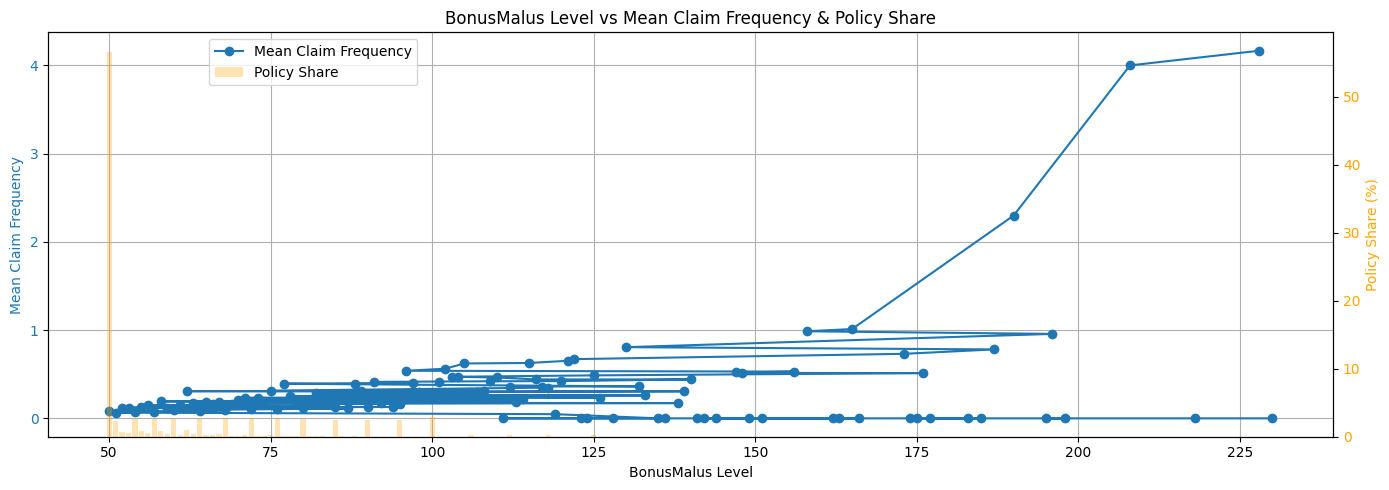

In [60]:
import matplotlib.pyplot as plt

# Variables to analyze
cat_vars = ['VehBrand', 'Region', 'Area', 'VehPower', 'BonusMalus']

# Loop over each variable
for var in cat_vars:
    print(f'\n\n***** Summary for {var} *****')

    summary = (
        df_freq_sev_v1
        .groupby(var, observed=True)
        .agg(
            PolicyCount=('IDpol', 'count'),
            ExposureSum=('Exposure_cap', 'sum'),
            ClaimNbSum=('ClaimNb_cap', 'sum')
        )
    )

    summary['MeanClaimFreq'] = summary['ClaimNbSum'] / summary['ExposureSum']
    summary['SharePolicies'] = (summary['PolicyCount'] / df_freq_sev_v1.shape[0]) * 100

    # Sorting
    if var == 'BonusMalus':
        summary = summary.sort_values(by='MeanClaimFreq', ascending=False)
        display(summary.head(20))
    else:
        summary = summary.sort_values(by='SharePolicies', ascending=False)
        display(summary.round(4))

# Plot for BonusMalus
if var == 'BonusMalus':
    fig, ax1 = plt.subplots(figsize=(14, 5))

    # Line plot for Mean Claim Frequency
    ax1.plot(summary.index, summary['MeanClaimFreq'], marker='o', linestyle='-', color='tab:blue', label='Mean Claim Frequency')
    ax1.set_ylabel('Mean Claim Frequency', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_xlabel('BonusMalus Level')
    ax1.set_title('BonusMalus Level vs Mean Claim Frequency & Policy Share')
    ax1.grid(True)

    # Twin axis for bar chart
    ax2 = ax1.twinx()
    ax2.bar(summary.index, summary['SharePolicies'], color='orange', alpha=0.3, label='Policy Share')
    ax2.set_ylabel('Policy Share (%)', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Combined legend
    lines, labels = ax1.get_legend_handles_labels()
    bars, bar_labels = ax2.get_legend_handles_labels()
    ax1.legend(lines + bars, labels + bar_labels, loc='upper left', bbox_to_anchor=(0.12, 1))

    plt.tight_layout()
    plt.show()

#### Step 6.A: Feature Engineering — Frequency model implementations

In [61]:
# Create version 2 dataset
df_freq_sev_v2 = df_freq_sev_v1.copy()

In [62]:
# Implementation: Bin VehBrand for Frequency Modeling
def group_vehbrand(brand):
    if brand == 'B12':
        return 'Group_B12'  # High volume & high frequency
    elif brand in ['B5', 'B11']:
        return 'Group_Risky'  # Low volume but above-average frequency
    elif brand in ['B1', 'B2', 'B3', 'B4', 'B6', 'B10', 'B13']:
        return 'Group_Standard'  # Moderate volume and risk
    elif brand == 'B14':
        return 'Group_Other'  # Rare and low frequency
    else:
        return 'Group_Other'  # Default fallback


# Apply function. Create new column
df_freq_sev_v2['VehBrand_bin'] = df_freq_sev_v2['VehBrand'].apply(group_vehbrand).astype('category')

print(df_freq_sev_v2['VehBrand_bin'].value_counts(dropna=False))

VehBrand_bin
Group_Standard    459604
Group_B12         166024
Group_Risky        48338
Group_Other         4047
Name: count, dtype: int64


In [63]:
# Implementation: Bin Region for Frequency Modeling
def group_region(region):
    if region in ['R11', 'R21', 'R94', 'R22']:
        return 'High_Risk' # Elevated claim frequency
    elif region in ['R82', 'R93']:
        return 'Med_High_Risk' # Above-average frequency and volume.
    elif region in ['R41', 'R83']:
        return 'Low_Risk' # Consistently low claim frequency.
    elif region in [
        'R24', 'R52', 'R53', 'R72', 'R91', 'R31',
        'R25', 'R26', 'R23', 'R73', 'R54'
    ]:
        return 'Medium_Risk' # Standard risk regions with balanced exposure.
    else:
        return 'Other' # Rare or unclassified regions grouped for stability.

# Apply function. Create new column
df_freq_sev_v2['Region_bin'] = df_freq_sev_v2['Region'].apply(group_region).astype('category')

print(df_freq_sev_v2['Region_bin'].value_counts(dropna=False))

Region_bin
Medium_Risk      402249
Med_High_Risk    164067
High_Risk         85327
Low_Risk          18277
Other              8093
Name: count, dtype: int64


In [64]:
# Implementation: Bin Area for Frequency Modeling
def group_area(area):
    if area == 'F':
        return 'High_Risk'  # Highest mean claim frequency
    elif area == 'E':
        return 'Med_High_Risk'  # High frequency, moderate volume
    elif area in ['C', 'D']:
        return 'Medium_Risk'  # Balanced exposure and frequency
    elif area in ['A', 'B']:
        return 'Low_Risk'  # Lower claim frequency
    else:
        return 'Other'  # Fallback for any unknown value

# Apply function. Create new column
df_freq_sev_v2['Area_bin'] = df_freq_sev_v2['Area'].apply(group_area).astype('category')

print(df_freq_sev_v2['Area_bin'].value_counts(dropna=False))

Area_bin
Medium_Risk      343476
Low_Risk         179416
Med_High_Risk    137167
High_Risk         17954
Name: count, dtype: int64


In [65]:
# Implementation: Bin VehPower for Frequency Modeling
def group_vehpower(power):
    if power in [5, 6, 7]:
        return 'Very_High_Volume'  # Most common, average freq
    elif power in [4, 8]:
        return 'High_Volume_Low_Risk'  # Common but slightly lower freq
    elif power in [9, 10, 11]:
        return 'Mid_Volume_High_Risk'  # Moderate vol, elevated freq
    elif power in [12, 13, 14, 15]:
        return 'Low_Volume'  # Rare values, neutral freq
    else:
        return 'Other'

# Apply function. Create new column
df_freq_sev_v2['VehPower_bin'] = df_freq_sev_v2['VehPower'].apply(group_vehpower).astype('category')

print(df_freq_sev_v2['VehPower_bin'].value_counts(dropna=False))


VehPower_bin
Very_High_Volume        419198
High_Volume_Low_Risk    162305
Mid_Volume_High_Risk     79791
Low_Volume               16719
Name: count, dtype: int64


In [66]:
# Implementation — Bin BonusMalus for Frequency Modeling

def group_bonusmalus(bm):
    if bm == 50:
        return 'Safe_50'  # High volume, very low frequency
    elif 51 <= bm <= 75:
        return 'Standard_55_75'  # Moderate volume, low-moderate frequency
    elif 76 <= bm <= 100:
        return 'Elevated_80_100'  # Rising claim frequency
    elif 101 <= bm <= 150:
        return 'High_100_150'  # Lower volume, notable risk increase
    elif bm > 150:
        return 'Extreme_150plus'  # Rare, very high frequency
    else:
        return 'Other'

# Apply function. Create new column
df_freq_sev_v2['BonusMalus_bin'] = df_freq_sev_v2['BonusMalus'].apply(group_bonusmalus).astype('category')

In [67]:
import pandas as pd
import numpy as np

# Closer look at BonusMalus binning
# Global average frequency (benchmark)
global_avg_freq = df_freq_sev_v2['ClaimNb_cap'].sum() / df_freq_sev_v2['Exposure_cap'].sum()
print(f'Global Mean Claim Frequency: {global_avg_freq:.4f}')

# Summary stats by BonusMalus_bin
benchmark_table = (
    df_freq_sev_v2
    .groupby('BonusMalus_bin', observed=True)
    .agg(
        PolicyCount=('IDpol', 'count'),
        ExposureSum=('Exposure_cap', 'sum'),
        ClaimNbSum=('ClaimNb_cap', 'sum')
    )
)

# Calculate mean claim frequency and relative to global mean
benchmark_table['MeanClaimFreq'] = benchmark_table['ClaimNbSum'] / benchmark_table['ExposureSum']
benchmark_table['RelativeToGlobal'] = benchmark_table['MeanClaimFreq'] / global_avg_freq
benchmark_table['SharePolicies'] = (benchmark_table['PolicyCount'] / len(df_freq_sev_v2)) * 100

benchmark_table = benchmark_table.sort_values(by='MeanClaimFreq')

pd.options.display.float_format = '{:,.4f}'.format
display(benchmark_table.round(4))

Global Mean Claim Frequency: 0.1006


,PolicyCount,ExposureSum,ClaimNbSum,MeanClaimFreq,RelativeToGlobal,SharePolicies
BonusMalus_bin,,,,,,
Safe_50,384156,"225,152.6509",18010,0.0800,0.7950,56.6591
Standard_55_75,175012,"84,830.2573",9614,0.1133,1.1264,25.8125
Elevated_80_100,111051,"44,806.4683",7090,0.1582,1.5727,16.3789
High_100_150,7585,"3,475.6008",1288,0.3706,3.6832,1.1187
Extreme_150plus,209,95.1282,54,0.5677,5.6419,0.0308


In [68]:
# Add exposure_log to the dataframe
df_freq_sev_v2['exposure_log'] = np.log(df_freq_sev_v2['Exposure_cap'])

##### df_freq_sev_v2 Final Frequency dataset update

In this update, we created a new modeling-ready version of our dataset by adding the following engineered features based on business logic and statistical diagnostics:

- **VehBrand_bin**: Grouped 11 vehicle brands into 3 volume and risk-based segments:
  - *Group_B12*: High volume and high frequency.
  - *Group_Standard*: Moderate risk and volume.
  - *Group_Risky*: Low volume but above-average claim frequency.
  - *Group_Other*: Rare and low-risk brands.

- **Region_bin**: Grouped 22 regions into 5 volume and risk-based segments:
  - *High_Risk*: Elevated claim frequency.
  - *Med_High_Risk*: Above-average frequency and volume.
  - *Medium_Risk*: Standard risk regions with balanced exposure.
  - *Low_Risk*: Consistently low claim frequency.
  - *Other*: Rare or unclassified regions grouped for stability.

- **Area_bin**: Grouped 6 area types into 4 volume and risk-based segments:
  - *High_Risk*: Least common but highest claim frequency.
  - *Med_High_Risk*: High volume with elevated risk.
  - *Medium_Risk*: Average claim frequency.
  - *Low_Risk*: Consistently low claim frequency.
  - *Other*: Rare or unclassified regions grouped for stability.

- **VehPower_bin**: Grouped 12 engine power levels into 4 volume and risk-based segments:
  - *Very_High_Volume*: Consistent average claim frequency (>60% of volume).
  - *High_Volume_Low_Risk*: Lower-than-average claim frequency.
  - *Mid_Volume_High_Risk*: Moderate volume but elevated claim frequency.
  - *Low_Volume*: Rare combinations with limited contribution.
  - *Other*: Fallback group for unseen or unexpected values.

- **BonusMalus_bin_v2**: Grouped 115 BonusMalus levels into 5 volume and risk-based segments. Benchmarking confirmed a strong monotonic risk pattern across BonusMalus levels: low levels showed low claim frequency and high volume, while higher levels (especially 150+) exhibited steeply rising frequency and low volume:
  - *Safe_50*: Low claim frequency (>56% of volume).
  - *Standard_55_75*: Above-average risk.
  - *Elevated_80_100*: Moderate claim frequency with moderate volume.
  - *High_100_150*: Higher claim frequency but reduced volume.
  - *Extreme_150plus*: Elevated claim frequency but extremely rare.
  
  - **exposure_log**: Added as a column to allow accurate offset model computation.

These bins were informed by a bivariate analysis of mean claim frequency and volume to reduce dimensionality and avoid noise from rare levels.

In [69]:
# Final dataset
df_freq_sev_v2.drop(['BonusMalus','VehPower','Area','Region','VehBrand'], axis=1, inplace=True)

In [70]:
# Save final modeling dataset to a file
df_freq_sev_v2.to_csv('../data/df_freq_sev_v2.csv', index=False)

#### Step 6.B: Feature Engineering — Severity model (`df_freq_sev_v3`)



**** Severity Summary for VehBrand ****


,PolicyCount,TotalClaimAmount,ClaimNbSum,AvgClaimSeverity,SharePolicies
VehBrand,,,,,
B1,6509,"14,462,378.1400",6860,"2,108.2200",26.0900
B2,6487,"18,801,244.9000",6805,"2,762.8600",26.0100
B12,3826,"8,747,094.5800",4200,"2,082.6400",15.3400
B3,2304,"5,197,982.0700",2429,"2,139.9700",9.2400
B5,1580,"2,901,047.9300",1662,"1,745.5200",6.3300
B6,1189,"1,957,513.7400",1252,"1,563.5100",4.7700
B4,1053,"2,546,351.2100",1099,"2,316.9700",4.2200
B10,732,"1,683,301.3100",765,"2,200.3900",2.9300
B11,626,"2,228,920.3700",664,"3,356.8100",2.5100




**** Severity Summary for Region ****


,PolicyCount,TotalClaimAmount,ClaimNbSum,AvgClaimSeverity,SharePolicies
Region,,,,,
R24,6262,"19,074,802.3600",6475,"2,945.9200",25.1000
R82,4002,"10,278,303.8500",4233,"2,428.1400",16.0400
R93,2753,"6,871,024.8000",2985,"2,301.8500",11.0400
R11,2393,"4,563,221.8600",2592,"1,760.5000",9.5900
R53,1793,"3,901,051.2500",1871,"2,085.0100",7.1900
R52,1498,"2,570,964.9300",1576,"1,631.3200",6.0100
R72,985,"1,916,138.5400",1055,"1,816.2500",3.9500
R91,934,"2,030,911.0800",1030,"1,971.7600",3.7400
R31,872,"1,634,689.7200",944,"1,731.6600",3.5000




**** Severity Summary for Area ****


,PolicyCount,TotalClaimAmount,ClaimNbSum,AvgClaimSeverity,SharePolicies
Area,,,,,
C,6730,"14,612,072.4300",7093,"2,060.0700",26.9800
D,6043,"14,486,501.1600",6421,"2,256.1100",24.2300
E,5697,"13,017,426.3000",6121,"2,126.6800",22.8400
A,3237,"7,739,630.6700",3364,"2,300.7200",12.9800
B,2524,"8,873,979.5200",2633,"3,370.2900",10.1200
F,713,"1,179,606.4200",774,"1,524.0400",2.8600




**** Severity Summary for VehPower ****


,PolicyCount,TotalClaimAmount,ClaimNbSum,AvgClaimSeverity,SharePolicies
VehPower,,,,,
6,5976,"14,385,946.8300",6305,"2,281.6700",23.9600
7,5307,"12,426,397.1600",5592,"2,222.1700",21.2800
5,4835,"8,837,747.1400",5115,"1,727.8100",19.3800
4,3712,"9,410,083.4300",3965,"2,373.2900",14.8800
8,1555,"2,954,665.5100",1646,"1,795.0600",6.2300
9,1158,"6,265,052.6500",1220,"5,135.2900",4.6400
10,1137,"2,853,312.3300",1217,"2,344.5500",4.5600
11,665,"1,312,132.1600",714,"1,837.7200",2.6700
12,279,"707,682.2800",296,"2,390.8200",1.1200




**** Severity Summary for BonusMalus ****


,PolicyCount,TotalClaimAmount,ClaimNbSum,AvgClaimSeverity,SharePolicies
BonusMalus,,,,,
140,21,"249,584.2000",27,"9,243.8593",0.0842
120,1,"7,790.7400",1,"7,790.7400",0.0040
100,1202,"10,187,048.5800",1320,"7,717.4610",4.8188
63,243,"1,136,650.7100",251,"4,528.4889",0.9742
99,5,"21,817.6200",5,"4,363.5240",0.0200
187,2,"6,549.9700",2,"3,274.9850",0.0080
147,24,"89,597.8000",28,"3,199.9214",0.0962
156,23,"104,032.2500",33,"3,152.4924",0.0922
97,16,"56,258.5700",19,"2,960.9774",0.0641


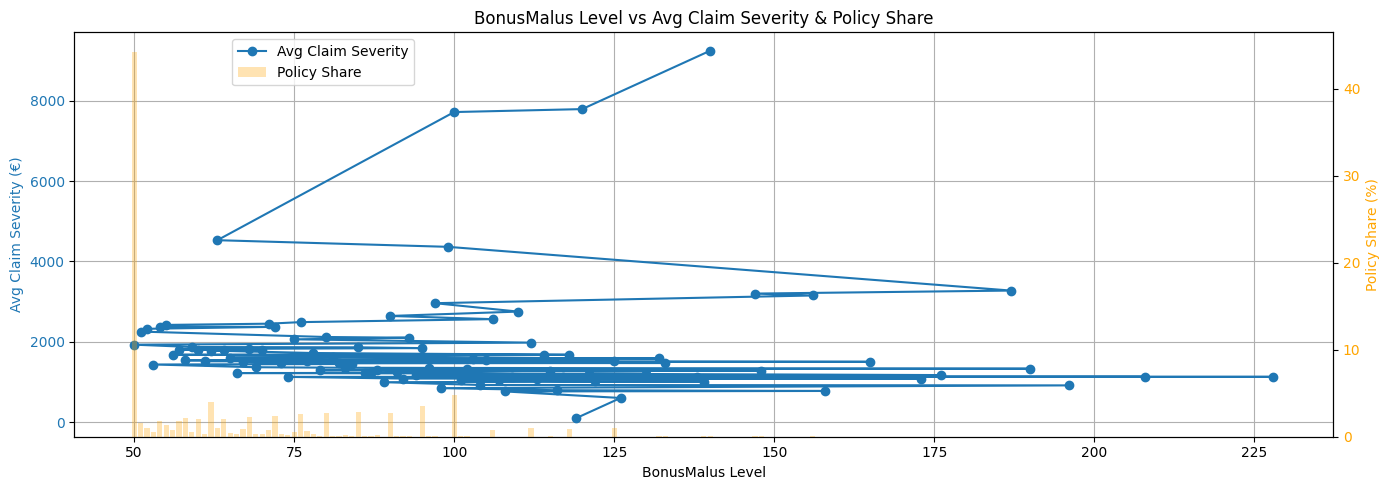

In [71]:
import matplotlib.pyplot as plt

# Filter records
df_sev = df_freq_sev_v1[df_freq_sev_v1['ClaimAmount'] > 0].copy()

# Variables to analyze
cat_vars = ['VehBrand', 'Region', 'Area', 'VehPower', 'BonusMalus']

# Loop over each variable
for var in cat_vars:
    print(f'\n\n**** Severity Summary for {var} ****')

    summary = (
        df_sev
        .groupby(var, observed=True)
        .agg(
            PolicyCount=('IDpol', 'count'),
            TotalClaimAmount=('ClaimAmount', 'sum'),
            ClaimNbSum=('ClaimNb_cap', 'sum')
        )
    )

    summary['AvgClaimSeverity'] = summary['TotalClaimAmount'] / summary['ClaimNbSum']
    summary['SharePolicies'] = (summary['PolicyCount'] / df_sev.shape[0]) * 100

    # Sorting
    if var == 'BonusMalus':
        summary = summary.sort_values(by='AvgClaimSeverity', ascending=False)
        display(summary.head(20))
    else:
        summary = summary.sort_values(by='SharePolicies', ascending=False)
        display(summary.round(2))

# Plot for BonusMalus
if 'BonusMalus' in cat_vars:
    fig, ax1 = plt.subplots(figsize=(14, 5))

    # Line plot for Avg Claim Severity
    ax1.plot(summary.index, summary['AvgClaimSeverity'], marker='o', linestyle='-', color='tab:blue', label='Avg Claim Severity')
    ax1.set_ylabel('Avg Claim Severity (€)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_xlabel('BonusMalus Level')
    ax1.set_title('BonusMalus Level vs Avg Claim Severity & Policy Share')
    ax1.grid(True)

    # Twin axis for bar chart
    ax2 = ax1.twinx()
    ax2.bar(summary.index, summary['SharePolicies'], color='orange', alpha=0.3, label='Policy Share')
    ax2.set_ylabel('Policy Share (%)', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Combined legend
    lines, labels = ax1.get_legend_handles_labels()
    bars, bar_labels = ax2.get_legend_handles_labels()
    ax1.legend(lines + bars, labels + bar_labels, loc='upper left', bbox_to_anchor=(0.12, 1))

    plt.tight_layout()
    plt.show()

#### Step 6.B: Feature Engineering — Severity model implementations

In [72]:
# Create version 3 dataset
df_freq_sev_v3 = df_freq_sev_v1.copy()

In [73]:
# Implementation: Bin VehBrand for Severity Modeling
def group_vehbrand_sev(brand):
    if brand in ['B1', 'B12']:
        return 'Group_Standard'  # High volume, average severity
    elif brand == 'B2':
        return 'Group_HighSeverity'  # Highest avg severity
    elif brand in ['B3', 'B4', 'B10']:
        return 'Group_Elevated'  # Medium volume, high avg severity
    elif brand in ['B5', 'B6', 'B13']:
        return 'Group_StableLow'  # Mid volume, manageable severity
    elif brand in ['B11', 'B14']:
        return 'Group_Unstable'  # Low volume, volatile
    else:
        return 'Group_Other'

# Apply function. Create new column
df_freq_sev_v3['VehBrand_bin'] = df_freq_sev_v3['VehBrand'].apply(group_vehbrand_sev).astype('category')

print(df_freq_sev_v3['VehBrand_bin'].value_counts(dropna=False))

VehBrand_bin
Group_Standard        328760
Group_HighSeverity    159861
Group_Elevated         96281
Group_StableLow        75479
Group_Unstable         17632
Name: count, dtype: int64


In [74]:
# Implementation: Bin Region for Severity Modeling
def group_region_sev(region):
    if region in ['R24', 'R82']:
        return 'Group_High_Risk'  # High volume & severity
    elif region == 'R11':
        return 'Group_Low_Risk'  # High volume, low severity
    elif region in ['R93', 'R53', 'R52', 'R91', 'R72', 'R31', 'R54']:
        return 'Group_Mid_Risk'  # Balanced severity and volume
    elif region in ['R73', 'R25', 'R41', 'R26', 'R22', 'R23', 'R74', 'R94']:
        return 'Group_Low_Volume'  # Small share, medium severity
    elif region in ['R21', 'R42', 'R43', 'R83']:
        return 'Group_Volatile'  # Rare, volatile or extreme severity
    else:
        return 'Group_Other'

# Apply function. Create new column
df_freq_sev_v3['Region_bin'] = df_freq_sev_v3['Region'].apply(group_region_sev).astype('category')

print(df_freq_sev_v3['Region_bin'].value_counts(dropna=False))

Region_bin
Group_Mid_Risk      273653
Group_High_Risk     245353
Group_Low_Volume     77377
Group_Low_Risk       69791
Group_Volatile       11839
Name: count, dtype: int64


In [75]:
# Implementation: Bin Area for Severity Modeling
def group_area_sev(area):
    if area == 'B':
        return 'Group_High_Risk'  # Highest avg severity
    elif area in ['C', 'D', 'E', 'A']:
        return 'Group_Standard'  # Combined: stable + moderately high
    elif area == 'F':
        return 'Group_Low_Risk'  # Lowest volume and severity
    else:
        return 'Group_Other'

# Apply function. Create new column
df_freq_sev_v3['Area_bin'] = df_freq_sev_v3['Area'].apply(group_area_sev).astype('category')

print(df_freq_sev_v3['Area_bin'].value_counts(dropna=False))


Area_bin
Group_Standard     584600
Group_High_Risk     75459
Group_Low_Risk      17954
Name: count, dtype: int64


In [76]:
# Implementation: Bin VehPower for Severity Modeling
def group_vehpower_sev(power):
    if power in [6, 7]:
        return 'Group_Core_HighVol'  # High volume, stable severity
    elif power in [5, 4]:
        return 'Group_LowRisk'  # Slightly lower severity, still high volume
    elif power in [8, 10]:
        return 'Group_MidVol'  # Moderate volume and severity
    elif power == 9:
        return 'Group_Risky'  # Very high severity
    elif power in [11, 12, 13, 14, 15]:
        return 'Group_LowVol_Mixed'  # Low volume, grouped together
    else:
        return 'Group_Other'

# Apply function. Create new column
df_freq_sev_v3['VehPower_bin'] = df_freq_sev_v3['VehPower'].apply(group_vehpower_sev).astype('category')

print(df_freq_sev_v3['VehPower_bin'].value_counts(dropna=False))

VehPower_bin
Group_Core_HighVol    294377
Group_LowRisk         240170
Group_MidVol           78310
Group_LowVol_Mixed     35071
Group_Risky            30085
Name: count, dtype: int64


In [77]:
# Implementation: Bin BonusMalus for Severity Modeling
def group_bonusmalus_sev(bm):
    if bm <= 55:
        return 'Safe_50_55'
    elif 56 <= bm <= 75:
        return 'Standard_60_75'
    elif 76 <= bm <= 99:
        return 'Elevated_80_99'
    elif 100 <= bm <= 140:
        return 'High_100_140'
    elif bm > 140:
        return 'Extreme_140plus'
    else:
        return 'Other'

# Apply function. Create new column
df_freq_sev_v3['BonusMalus_bin'] = df_freq_sev_v3['BonusMalus'].apply(group_bonusmalus_sev).astype('category')

print(df_freq_sev_v3['BonusMalus_bin'].value_counts(dropna=False))

BonusMalus_bin
Safe_50_55         431099
Standard_60_75     128069
Elevated_80_99      91521
High_100_140        26916
Extreme_140plus       408
Name: count, dtype: int64


##### df_freq_sev_v3 Final Severity dataset update

In this update, we created a new modeling-ready version of our dataset by engineering categorical features specifically for **severity modeling**. Bins were created based on a combined assessment of **volume**, **average claim severity**, and **risk concentration**, ensuring interpretability and robustness in GLM-based models.

- **VehBrand_bin**: Grouped 11 vehicle brands into 5 volume and risk-based segments:
  - *Group_Standard*: High volume and average severity.
  - *Group_HighSeverity*: High volume and highest claim severity.
  - *Group_Elevated*: Moderate volume with consistently high severity.
  - *Group_StableLow*: Stable average severity and mid-level exposure.
  - *Group_Unstable*: Low volume and volatile behavior.

- **Region_bin**: Grouped 22 regions into 5 volume and risk-based segments:
  - *Group_High_Risk*: High exposure and severity.
  - *Group_Mid_Risk*: Balanced performance.
  - *Group_Low_Risk*: High volume and low severity.
  - *Group_Low_Volume*: Small volumes.
  - *Group_Volatile*: Rare and erratic patterns.

- **Area_bin**: Grouped 6 area types into 3 segments:
  - *Group_High_Risk*: Highest average severity.
  - *Group_Standard*: Large volume, moderate severity.
  - *Group_Low_Risk*: Small exposure and lowest severity.

- **VehPower_bin**: Grouped 12 engine power levels into 5 segments:
  - *Group_Core_HighVol*: Majority of observations, stable severity.
  - *Group_LowRisk*: Good exposure, mild severity.
  - *Group_MidVol*: Middle segment.
  - *Group_Risky*: High severity despite small share.
  - *Group_LowVol_Mixed*: Rare combinations.

- **BonusMalus_bin**: Grouped BonusMalus levels into 5 severity bands:
  - *Safe_50_55*: Historically safest and stable.
  - *Standard_60_75*: Slight increase in average severity.
  - *Elevated_80_99*: Rising severity from the 80s upward.
  - *High_100_140*: High severity, with larger jumps in impact.
  - *Extreme_140plus*: Rare, extremely high claim severity cases.

- **AvgClaimAmount**: Retained for reference and for validation of binning logic.

These engineered features allow for effective segmentation in GLMs while preserving interpretability and model stability.

In [78]:
# Add Average Claim Amount
df_freq_sev_v3['AvgClaimAmount'] = df_freq_sev_v3['ClaimAmount']/df_freq_sev_v3['ClaimNb_cap']

In [79]:
# Final dataset
df_freq_sev_v3.drop(['BonusMalus','VehPower','Area','Region','VehBrand'], axis=1, inplace=True)

In [80]:
# Save the final modeling dataset to a file
df_freq_sev_v3.to_csv('../data/df_freq_sev_v3.csv', index=False)

In [81]:
df_freq_sev_v1.info()
df_freq_sev_v2.info()
df_freq_sev_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   IDpol         678013 non-null  int64   
 1   ClaimNb_cap   678013 non-null  int64   
 2   Exposure_cap  678013 non-null  float64 
 3   ClaimAmount   678013 non-null  float64 
 4   VehAge_cap    678013 non-null  int64   
 5   DrivAge_cap   678013 non-null  int64   
 6   Density       678013 non-null  int64   
 7   VehPower      678013 non-null  int64   
 8   BonusMalus    678013 non-null  int64   
 9   Area          678013 non-null  category
 10  VehBrand      678013 non-null  category
 11  VehGas        678013 non-null  category
 12  Region        678013 non-null  category
 13  Density_log   678013 non-null  float64 
 14  VehAge_log    678013 non-null  float64 
dtypes: category(4), float64(4), int64(7)
memory usage: 59.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 ent

In [82]:
# Check for NaNs, infs, and zeros in AvgClaimAmount
print('NaN values in AvgClaimAmount:', df_freq_sev_v3['AvgClaimAmount'].isna().sum())
print('Inf values in AvgClaimAmount:', np.isinf(df_freq_sev_v3['AvgClaimAmount']).sum())
print('Zero values in AvgClaimAmount:', (df_freq_sev_v3['AvgClaimAmount'] == 0).sum())

# Show a few problematic rows
problematic = df_freq_sev_v3[
    df_freq_sev_v3['AvgClaimAmount'].isna() | 
    np.isinf(df_freq_sev_v3['AvgClaimAmount'])
]
print('\nSample of problematic rows:')
display(problematic[['ClaimAmount', 'ClaimNb_cap', 'AvgClaimAmount']].head())

NaN values in AvgClaimAmount: 643953
Inf values in AvgClaimAmount: 0
Zero values in AvgClaimAmount: 9116

Sample of problematic rows:


,ClaimAmount,ClaimNb_cap,AvgClaimAmount
9387,0.0000,0,NaN
9388,0.0000,0,NaN
9389,0.0000,0,NaN
9390,0.0000,0,NaN
9391,0.0000,0,NaN
